=== Loading and Initial Data Inspection ===
Data loaded successfully from F:/Abrar/CVD-XAI/Dataset/data/raw/Heart Disease Health Indicators Dataset.csv
Dataset shape: (253680, 22)

Basic info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDiseaseorAttack  253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   Diabetes              253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsu

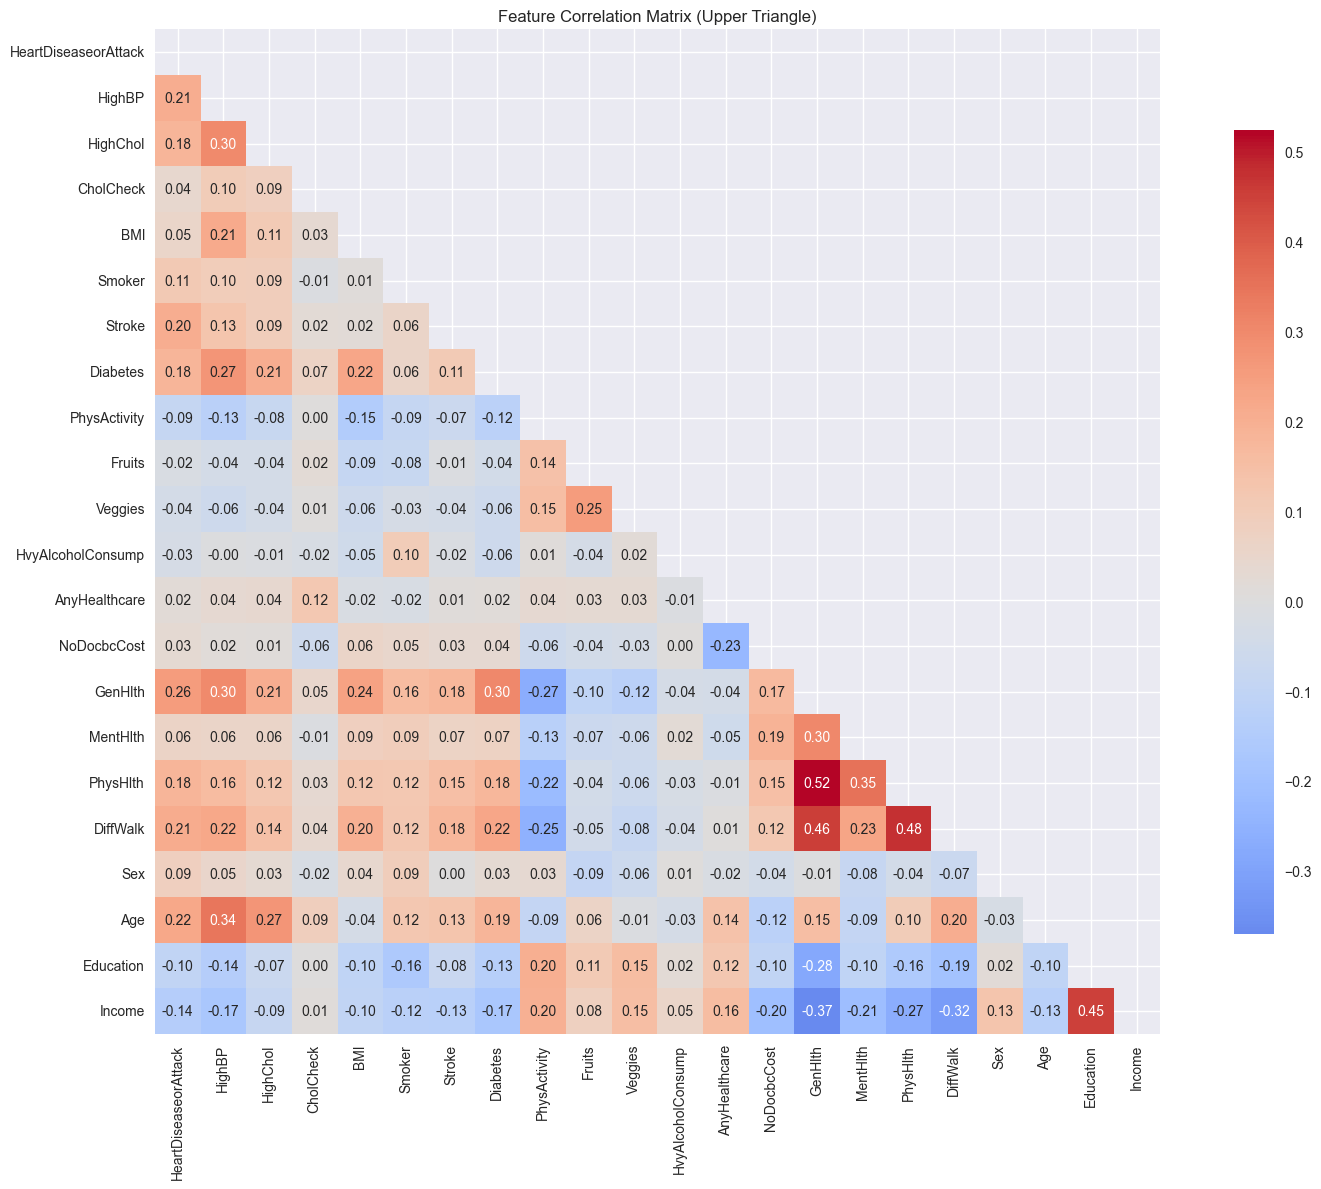

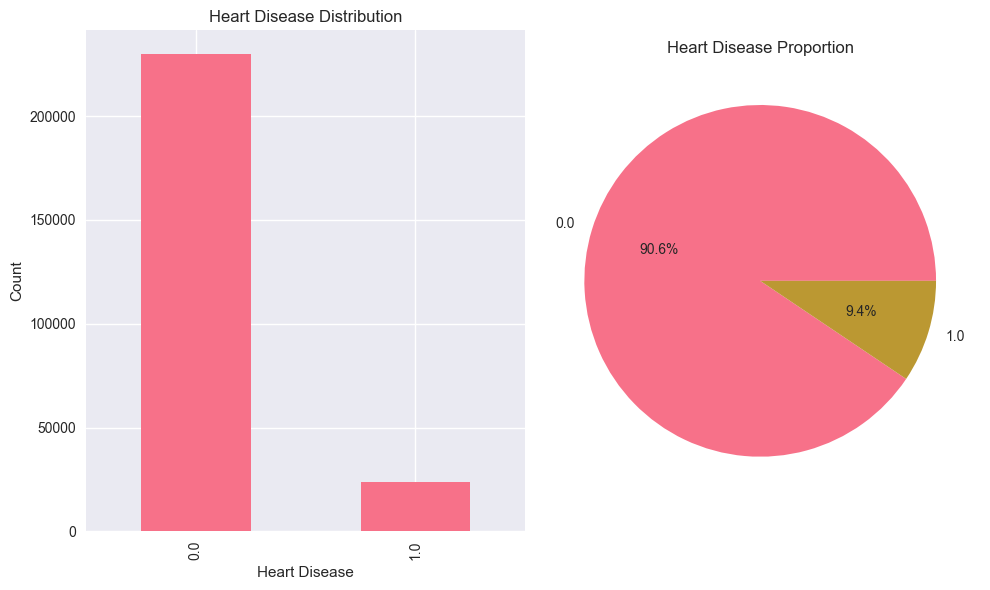

Numeric features: 22
Categorical features: 0


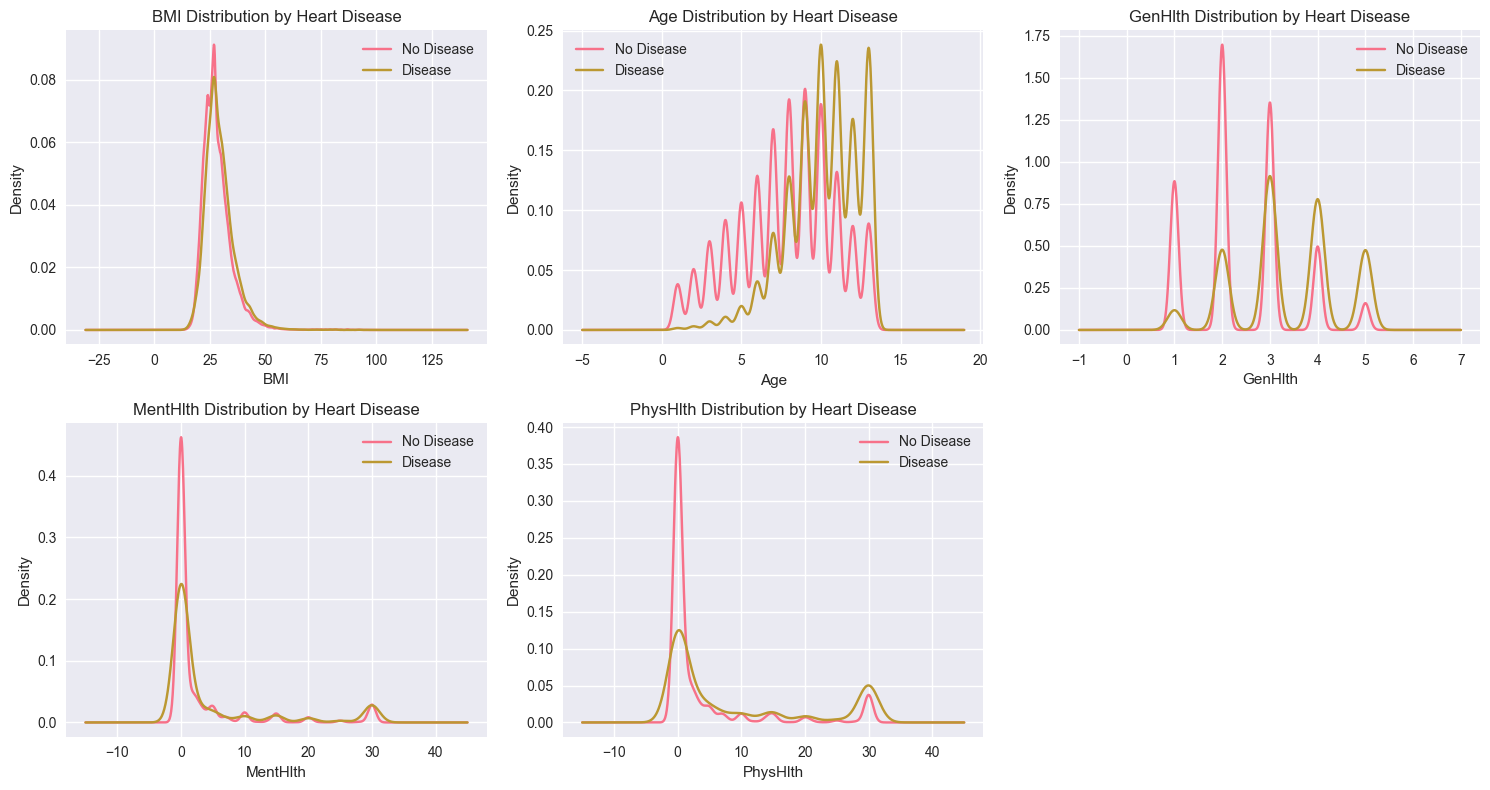


=== Handling Missing Values and Duplicates ===
Missing values per column:
Series([], dtype: int64)
No missing values found.
Number of duplicate rows: 23899


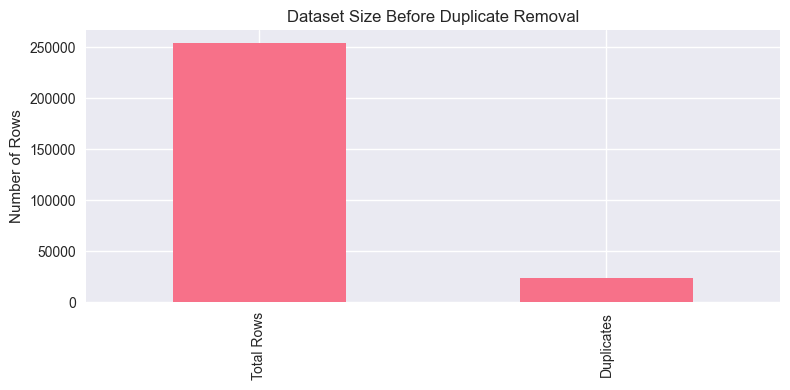

Removed 23899 duplicate rows.
New dataset shape: (229781, 22)


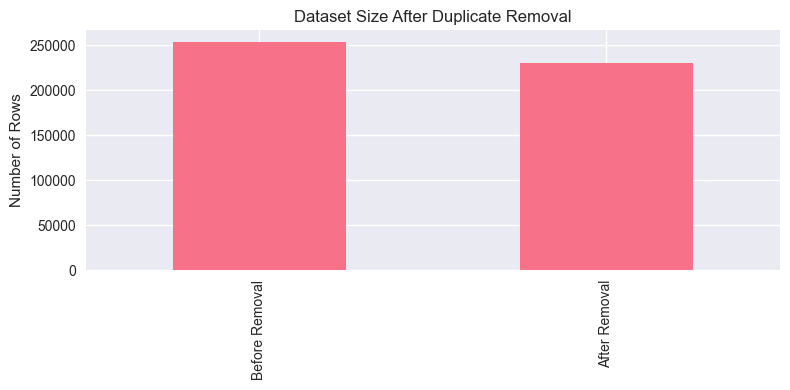


=== Feature Engineering ===
Original features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Target variable shape: (229781,)
Original features: ['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke', 'Diabetes', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']
Created 4 new clinical features
New features: ['BMI_Category', 'Age_Group', 'Health_Risk_Score', 'BMI_BP_Interaction']
Enhanced features shape: (229781, 25)
Created 4 new clinical features

=== Data Splitting ===
Training set shape: X_train (183824, 25), y_train (183824,)
Test set shape: X_test (45957, 25), y_test (45957,)


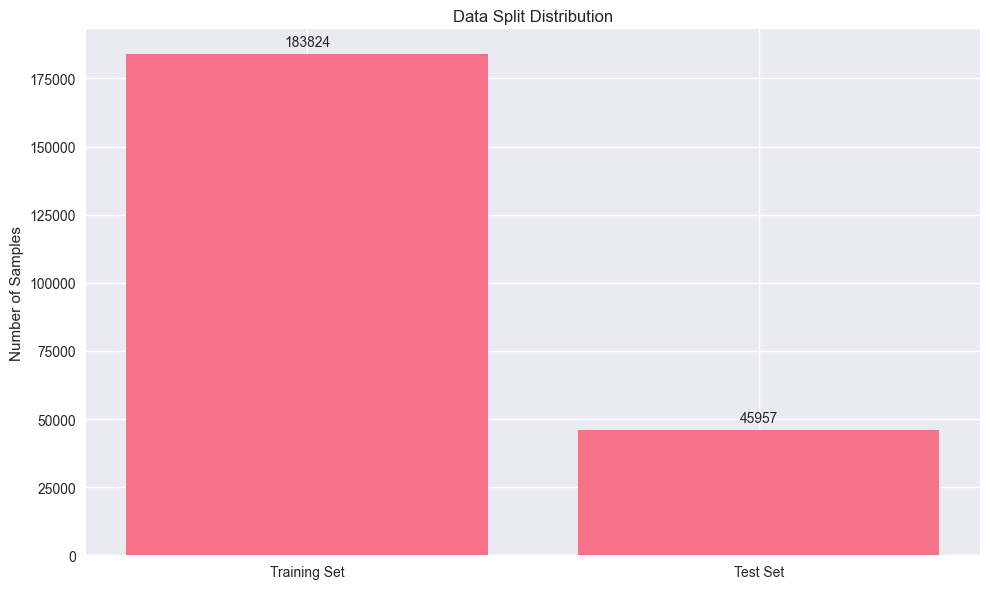


Class distribution in training set:
HeartDiseaseorAttack
0.0    0.896782
1.0    0.103218
Name: proportion, dtype: float64

Class distribution in test set:
HeartDiseaseorAttack
0.0    0.896795
1.0    0.103205
Name: proportion, dtype: float64


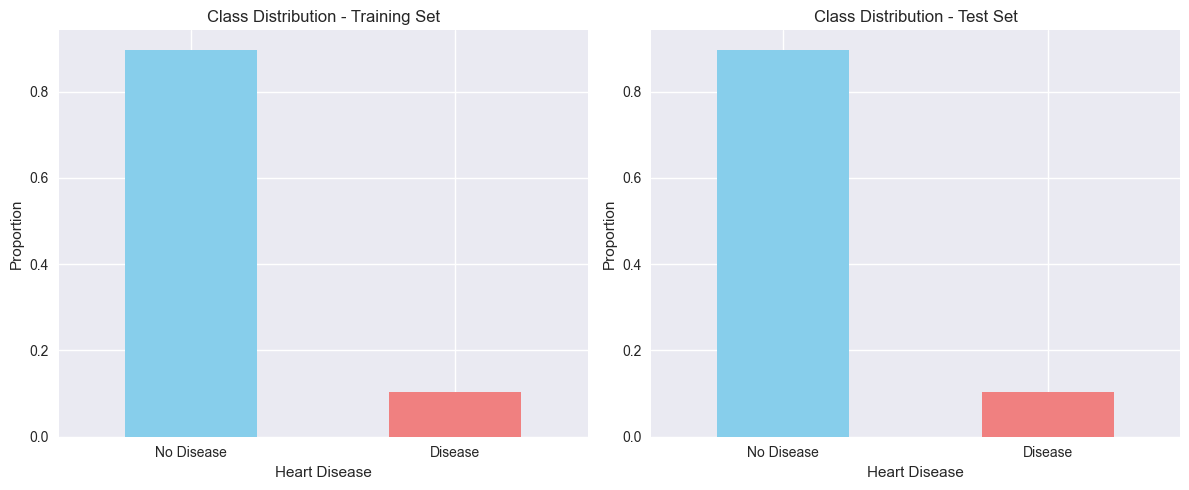


=== Feature Scaling ===
Feature scaling completed using StandardScaler
Scaled training set mean: -0.000000, std: 0.979796
Scaled test set mean: -0.000397, std: 0.979821


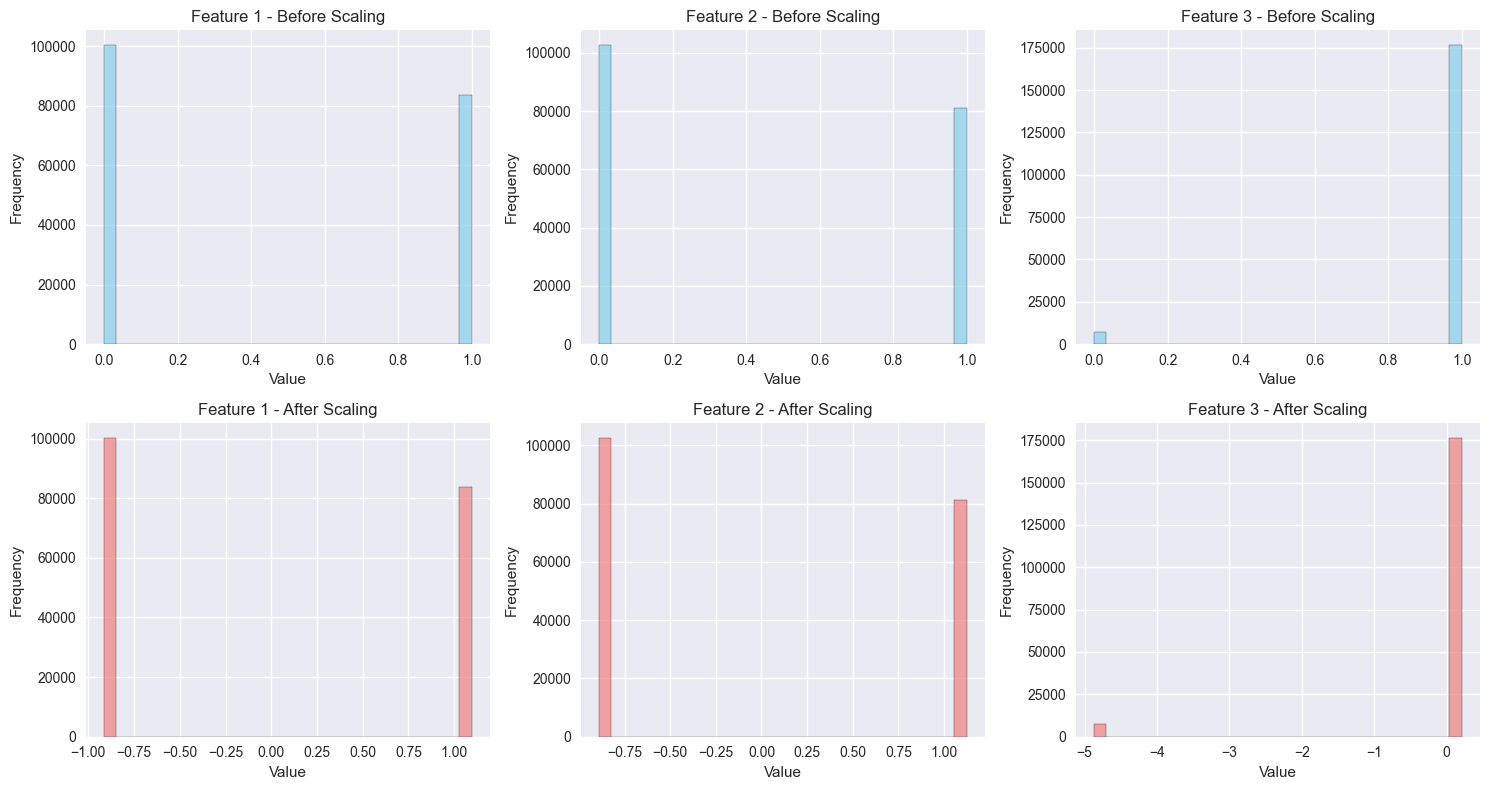


=== Saving Processed Data ===
Processed data saved successfully:
✓ X_train_scaled.npy
✓ X_test_scaled.npy
✓ y_train.npy
✓ y_test.npy
✓ feature_names.npy
✓ scaler.pkl

=== Preprocessing Summary ===
Original dataset shape: (229781, 22)
Final training set shape: (183824, 25)
Final test set shape: (45957, 25)
Number of features: 25
Positive class proportion: 0.103
Class ratio (minority:majority): 0.115


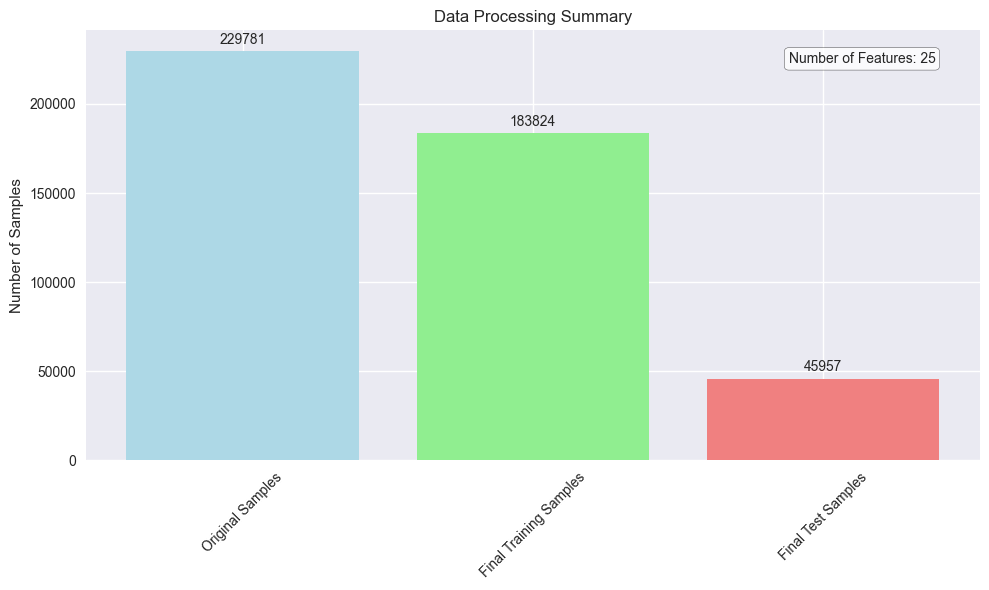

⚠️  Significant class imbalance detected - consider using class weights or resampling

All plots saved as SVG and PNG formats in: ../plots

=== Preprocessing Complete ===


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import os
import sys


DATA_PATH = "F:/Abrar/CVD-XAI/Dataset/data/raw/Heart Disease Health Indicators Dataset.csv"
PLOTS_DIR = "../plots"
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


os.makedirs("../data/processed", exist_ok=True)
os.makedirs(PLOTS_DIR, exist_ok=True)


def load_data(file_path):
    """Load dataset from CSV file"""
    try:
        df = pd.read_csv(file_path)
        print(f"Data loaded successfully from {file_path}")
        return df
    except FileNotFoundError:
        print(f"Error: File not found at {file_path}")
        # Try alternative path
        alternative_path = "Heart Disease Health Indicators Dataset.csv"
        if os.path.exists(alternative_path):
            df = pd.read_csv(alternative_path)
            print(f"Data loaded from alternative path: {alternative_path}")
            return df
        else:
            raise FileNotFoundError(f"Could not find data file at {file_path} or {alternative_path}")

def explore_data(df):
    """Perform basic exploratory data analysis"""
    print("\n--- Basic Data Exploration ---")
    print(f"Dataset shape: {df.shape}")
    print("\nData types:")
    print(df.dtypes)

    print("\nSummary statistics:")
    print(df.describe())

    # Check for missing values
    missing_values = df.isnull().sum()
    if missing_values.sum() > 0:
        print("\nMissing values:")
        print(missing_values[missing_values > 0])
    else:
        print("\nNo missing values found.")

    # Check target variable distribution
    if 'HeartDiseaseorAttack' in df.columns:
        print(f"\nTarget variable distribution:")
        print(df['HeartDiseaseorAttack'].value_counts())
        print(f"Positive class proportion: {df['HeartDiseaseorAttack'].mean():.3f}")

def create_clinical_features(X, feature_names):
    """
    Create enhanced clinical features from the original dataset

    Parameters:
    X: numpy array of features
    feature_names: list of feature names

    Returns:
    Enhanced feature array
    """
    # Convert back to DataFrame for easier manipulation
    df = pd.DataFrame(X, columns=feature_names)

    print("Original features:", feature_names)

    # List to track new feature names
    new_feature_names = feature_names.copy()


    # BMI categories
    if 'BMI' in df.columns:
        # Create BMI categories
        df['BMI_Category'] = pd.cut(df['BMI'],
                                   bins=[0, 18.5, 25, 30, 100],
                                   labels=['Underweight', 'Normal', 'Overweight', 'Obese'])
        # Convert to numerical codes
        df['BMI_Category'] = df['BMI_Category'].cat.codes
        new_feature_names.append('BMI_Category')

    # Age groups
    if 'Age' in df.columns:
        # Create age groups
        df['Age_Group'] = pd.cut(df['Age'],
                                bins=[0, 35, 50, 65, 100],
                                labels=['Young', 'Middle-aged', 'Senior', 'Elderly'])
        df['Age_Group'] = df['Age_Group'].cat.codes
        new_feature_names.append('Age_Group')

    # Health risk score (example combination)
    if all(col in df.columns for col in ['HighBP', 'HighChol', 'Diabetes']):
        df['Health_Risk_Score'] = df['HighBP'] + df['HighChol'] + df['Diabetes']
        new_feature_names.append('Health_Risk_Score')

    # 4. Interaction terms
    if all(col in df.columns for col in ['BMI', 'HighBP']):
        df['BMI_BP_Interaction'] = df['BMI'] * df['HighBP']
        new_feature_names.append('BMI_BP_Interaction')

    print(f"Created {len(new_feature_names) - len(feature_names)} new clinical features")
    print("New features:", [name for name in new_feature_names if name not in feature_names])

    return df.values

# Load and inspect data
print("=== Loading and Initial Data Inspection ===")
df = load_data(DATA_PATH)
print(f"Dataset shape: {df.shape}")
print("\nBasic info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

print("\nDataset description:")
print(df.describe())

if 'HeartDiseaseorAttack' in df.columns:
    print("\nTarget variable distribution:")
    print(df['HeartDiseaseorAttack'].value_counts())
    print(f"Target variable proportion: {df['HeartDiseaseorAttack'].mean():.3f}")
else:
    print("\nWarning: 'HeartDiseaseorAttack' column not found in dataset")
    print("Available columns:", df.columns.tolist())
    # Try to identify target column
    target_candidates = ['HeartDiseaseorAttack', 'HeartDisease', 'Target', 'Class']
    target_col = None
    for candidate in target_candidates:
        if candidate in df.columns:
            target_col = candidate
            break

    if target_col:
        print(f"Using '{target_col}' as target variable")
        df.rename(columns={target_col: 'HeartDiseaseorAttack'}, inplace=True)
    else:
        # Use the last column as target (common convention)
        target_col = df.columns[-1]
        print(f"Using last column '{target_col}' as target variable")
        df.rename(columns={target_col: 'HeartDiseaseorAttack'}, inplace=True)

# Exploratory Data Analysis
print("\n=== Exploratory Data Analysis ===")
explore_data(df)

# Additional EDA
print("\n=== Additional Detailed EDA ===")

# Correlation matrix
plt.figure(figsize=(16, 12))
correlation_matrix = df.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix (Upper Triangle)')
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/correlation_matrix.svg", format='svg', bbox_inches='tight')
plt.savefig(f"{PLOTS_DIR}/correlation_matrix.png", format='png', bbox_inches='tight', dpi=300)
plt.show()

# Target distribution
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
df['HeartDiseaseorAttack'].value_counts().plot(kind='bar')
plt.title('Heart Disease Distribution')
plt.xlabel('Heart Disease')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['HeartDiseaseorAttack'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Heart Disease Proportion')
plt.ylabel('')
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/target_distribution.svg", format='svg', bbox_inches='tight')
plt.savefig(f"{PLOTS_DIR}/target_distribution.png", format='png', bbox_inches='tight', dpi=300)
plt.show()

# Feature distributions by target
numeric_features = df.select_dtypes(include=[np.number]).columns
categorical_features = df.select_dtypes(include=['object', 'category']).columns

print(f"Numeric features: {len(numeric_features)}")
print(f"Categorical features: {len(categorical_features)}")

# Plot distributions of key features vs target
key_features = ['BMI', 'Age', 'GenHlth', 'MentHlth', 'PhysHlth']
# Use only features that exist in the dataset
available_features = [f for f in key_features if f in df.columns]

if available_features:
    n_features = len(available_features)
    n_cols = min(3, n_features)
    n_rows = (n_features + n_cols - 1) // n_cols

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
    if n_features == 1:
        axes = [axes]
    elif n_rows > 1:
        axes = axes.ravel()

    for i, feature in enumerate(available_features):
        if i < len(axes):
            df.groupby('HeartDiseaseorAttack')[feature].plot(kind='kde', ax=axes[i])
            axes[i].set_title(f'{feature} Distribution by Heart Disease')
            axes[i].legend(['No Disease', 'Disease'])
            axes[i].set_xlabel(feature)

    # Remove empty subplots
    for i in range(n_features, n_rows * n_cols):
        if n_rows == 1:
            fig.delaxes(axes[i])
        else:
            fig.delaxes(axes[i])

    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/feature_distributions.svg", format='svg', bbox_inches='tight')
    plt.savefig(f"{PLOTS_DIR}/feature_distributions.png", format='png', bbox_inches='tight', dpi=300)
    plt.show()

# Handle missing values and duplicates
print("\n=== Handling Missing Values and Duplicates ===")

# Check for missing values
print("Missing values per column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

# Visualize missing values if any
if missing_values.sum() > 0:
    plt.figure(figsize=(10, 6))
    missing_values[missing_values > 0].plot(kind='bar')
    plt.title('Missing Values by Column')
    plt.ylabel('Number of Missing Values')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/missing_values.svg", format='svg', bbox_inches='tight')
    plt.savefig(f"{PLOTS_DIR}/missing_values.png", format='png', bbox_inches='tight', dpi=300)
    plt.show()

if missing_values.sum() > 0:
    # Handle missing values based on column type
    for column in df.columns:
        if df[column].isnull().sum() > 0:
            if df[column].dtype in ['float64', 'int64']:
                # Numerical columns: impute with median
                df[column].fillna(df[column].median(), inplace=True)
                print(f"Imputed missing values in {column} with median: {df[column].median()}")
            else:
                # Categorical columns: impute with mode
                mode_value = df[column].mode()[0] if not df[column].mode().empty else 'Unknown'
                df[column].fillna(mode_value, inplace=True)
                print(f"Imputed missing values in {column} with mode: {mode_value}")
else:
    print("No missing values found.")

# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

if duplicates > 0:
    # Visualize duplicates before removal
    plt.figure(figsize=(8, 4))
    pd.Series([len(df), duplicates], index=['Total Rows', 'Duplicates']).plot(kind='bar')
    plt.title('Dataset Size Before Duplicate Removal')
    plt.ylabel('Number of Rows')
    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/duplicates_before.svg", format='svg', bbox_inches='tight')
    plt.savefig(f"{PLOTS_DIR}/duplicates_before.png", format='png', bbox_inches='tight', dpi=300)
    plt.show()

    df_before = df.shape[0]
    df = df.drop_duplicates()
    df_after = df.shape[0]
    print(f"Removed {duplicates} duplicate rows.")
    print(f"New dataset shape: {df.shape}")

    # Visualize after removal
    plt.figure(figsize=(8, 4))
    pd.Series([df_before, df_after], index=['Before Removal', 'After Removal']).plot(kind='bar')
    plt.title('Dataset Size After Duplicate Removal')
    plt.ylabel('Number of Rows')
    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/duplicates_after.svg", format='svg', bbox_inches='tight')
    plt.savefig(f"{PLOTS_DIR}/duplicates_after.png", format='png', bbox_inches='tight', dpi=300)
    plt.show()

# Check for constant columns
constant_columns = [col for col in df.columns if df[col].nunique() <= 1]
if constant_columns:
    print(f"Constant columns found and removed: {constant_columns}")
    df = df.drop(columns=constant_columns)

# Feature engineering
print("\n=== Feature Engineering ===")
X = df.drop("HeartDiseaseorAttack", axis=1)
y = df["HeartDiseaseorAttack"]
feature_names = X.columns.tolist()

print(f"Original features: {feature_names}")
print(f"Target variable shape: {y.shape}")

X_enhanced = create_clinical_features(X.values, feature_names)
print(f"Enhanced features shape: {X_enhanced.shape}")

# Update feature names if new features were created
if X_enhanced.shape[1] > len(feature_names):
    new_feature_count = X_enhanced.shape[1] - len(feature_names)
    print(f"Created {new_feature_count} new clinical features")

# Split data
print("\n=== Data Splitting ===")
X_train, X_test, y_train, y_test = train_test_split(
    X_enhanced, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set shape: X_test {X_test.shape}, y_test {y_test.shape}")

# Visualize data split
plt.figure(figsize=(10, 6))
split_data = {
    'Training Set': len(X_train),
    'Test Set': len(X_test)
}
plt.bar(split_data.keys(), split_data.values())
plt.title('Data Split Distribution')
plt.ylabel('Number of Samples')
for i, v in enumerate(split_data.values()):
    plt.text(i, v + max(split_data.values())*0.01, str(v), ha='center', va='bottom')
plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/data_split.svg", format='svg', bbox_inches='tight')
plt.savefig(f"{PLOTS_DIR}/data_split.png", format='png', bbox_inches='tight', dpi=300)
plt.show()

print("\nClass distribution in training set:")
train_dist = pd.Series(y_train).value_counts(normalize=True)
print(train_dist)

print("\nClass distribution in test set:")
test_dist = pd.Series(y_test).value_counts(normalize=True)
print(test_dist)

# Visualize class distribution in splits
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

train_dist.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Class Distribution - Training Set')
ax1.set_xlabel('Heart Disease')
ax1.set_ylabel('Proportion')
ax1.set_xticklabels(['No Disease', 'Disease'], rotation=0)

test_dist.plot(kind='bar', ax=ax2, color=['skyblue', 'lightcoral'])
ax2.set_title('Class Distribution - Test Set')
ax2.set_xlabel('Heart Disease')
ax2.set_ylabel('Proportion')
ax2.set_xticklabels(['No Disease', 'Disease'], rotation=0)

plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/class_distribution_splits.svg", format='svg', bbox_inches='tight')
plt.savefig(f"{PLOTS_DIR}/class_distribution_splits.png", format='png', bbox_inches='tight', dpi=300)
plt.show()

# Scale features
print("\n=== Feature Scaling ===")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Feature scaling completed using StandardScaler")
print(f"Scaled training set mean: {X_train_scaled.mean():.6f}, std: {X_train_scaled.std():.6f}")
print(f"Scaled test set mean: {X_test_scaled.mean():.6f}, std: {X_test_scaled.std():.6f}")

# Visualize scaling effect on first few features
if X_train.shape[1] >= 3:
    fig, axes = plt.subplots(2, 3, figsize=(15, 8))

    feature_indices = min(3, X_train.shape[1])
    for i in range(feature_indices):
        # Before scaling
        axes[0, i].hist(X_train[:, i], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
        axes[0, i].set_title(f'Feature {i+1} - Before Scaling')
        axes[0, i].set_xlabel('Value')
        axes[0, i].set_ylabel('Frequency')

        # After scaling
        axes[1, i].hist(X_train_scaled[:, i], bins=30, alpha=0.7, color='lightcoral', edgecolor='black')
        axes[1, i].set_title(f'Feature {i+1} - After Scaling')
        axes[1, i].set_xlabel('Value')
        axes[1, i].set_ylabel('Frequency')

    # Remove empty subplots
    for i in range(feature_indices, 3):
        fig.delaxes(axes[0, i])
        fig.delaxes(axes[1, i])

    plt.tight_layout()
    plt.savefig(f"{PLOTS_DIR}/scaling_effect.svg", format='svg', bbox_inches='tight')
    plt.savefig(f"{PLOTS_DIR}/scaling_effect.png", format='png', bbox_inches='tight', dpi=300)
    plt.show()

# Save processed data
print("\n=== Saving Processed Data ===")

np.save("../data/processed/X_train_scaled.npy", X_train_scaled)
np.save("../data/processed/X_test_scaled.npy", X_test_scaled)
np.save("../data/processed/y_train.npy", y_train)
np.save("../data/processed/y_test.npy", y_test)

# Save feature names and scaler
np.save("../data/processed/feature_names.npy", np.array(feature_names))
import joblib
joblib.dump(scaler, "../data/processed/scaler.pkl")

print("Processed data saved successfully:")
print("X_train_scaled.npy")
print("X_test_scaled.npy")
print("y_train.npy")
print("y_test.npy")
print("feature_names.npy")
print("scaler.pkl")

# Final summary
print("\n=== Preprocessing Summary ===")
print(f"Original dataset shape: {df.shape}")
print(f"Final training set shape: {X_train_scaled.shape}")
print(f"Final test set shape: {X_test_scaled.shape}")
print(f"Number of features: {X_train_scaled.shape[1]}")
print(f"Positive class proportion: {y.mean():.3f}")

# Check for class imbalance
class_ratio = y.value_counts().min() / y.value_counts().max()
print(f"Class ratio (minority:majority): {class_ratio:.3f}")

# Final summary visualization
summary_data = {
    'Original Samples': df.shape[0],
    'Final Training Samples': X_train_scaled.shape[0],
    'Final Test Samples': X_test_scaled.shape[0]
}

plt.figure(figsize=(10, 6))
bars = plt.bar(range(len(summary_data)), list(summary_data.values()),
               color=['lightblue', 'lightgreen', 'lightcoral'])
plt.title('Data Processing Summary')
plt.ylabel('Number of Samples')
plt.xticks(range(len(summary_data)), list(summary_data.keys()), rotation=45)

# Add value labels on bars
for bar, value in zip(bars, list(summary_data.values())):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + max(list(summary_data.values()))*0.01,
             str(value), ha='center', va='bottom')

# Add feature count as text annotation
plt.text(0.95, 0.95, f'Number of Features: {X_train_scaled.shape[1]}',
         transform=plt.gca().transAxes, ha='right', va='top',
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.savefig(f"{PLOTS_DIR}/processing_summary.svg", format='svg', bbox_inches='tight')
plt.savefig(f"{PLOTS_DIR}/processing_summary.png", format='png', bbox_inches='tight', dpi=300)
plt.show()

if class_ratio < 0.3:
    print("Significant class imbalance detected - consider using class weights or resampling")

print(f"\nAll plots saved as SVG and PNG formats in: {PLOTS_DIR}")
print("\n=== Preprocessing Complete ===")